## [Github Repository](https://github.com/Joshua-Quartey/Analyzing-Calgary-Energy-and-Emissions-Data.git)

## Data Cleaning and Preprocessing

### Load and Inspect the Dataset
This dataset is derived from BenchmarkYYC and contains annual, aggregated building energy and emissions data categorized by primary property type. It contains 494 rows and 31 columns.

<br>
<br>

### Handling Missing Data
Columns with missing values along with their counts are below

|Column name|Missing Values Count|Percentage|
|---|---|---|
|ENERGY STAR Score |329|66.6%|
|Weather Normalized Source Energy Use (GJ)|2|0.4%|
|Natural Gas Use (GJ)|10|2%|
|District Hot Water Use(GJ)|479|97%|
|Electricity Use – Generated from Onsite Renewable Systems (kWh)|44|91%|
|Green Power - Onsite and Offsite (kWh)|296|40%|
|Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)|296|40%|


Columns with more than 40% missing values were dropped meaning the following three columns were dropped:\
`Electricity Use – Generated from Onsite Renewable Systems (kWh)`, `ENERGY STAR Score`, `District Hot Water Use(GJ)`.

Missing values in numerical columns, were filled with the median of their respective column and those in categorical columns were filled with the mode of their respective column.

<br>
<br>

### Extracting and Cleaning Data Using Regex
- Regex was used to extract numeric values from text-based numeric columns (e.g., `Property GFA, Energy Use`). The following regex was used to match each group of up to 3 digits between the commas and before the decimal point in the first multiple capturing groups and then the decimal point and the digits that follow it are matched in the last capturing group\
`r"(((\d{1,3}),)*(\d{1,3})(\.\d+)?)"`\

- Regex was also used to standardize Postal Codes to follow the Canadian format (A1A 1A1). The regex used was as follows:\
`r"([A-Z][0-9][A-Z] [0-9][A-Z][0-9])"`\

- To clean text from the column `Address 1`, the street name was converted to a title case and the suffix was capitalized to maintain a consistent format for values in the column. The following regex was used to identify column values that were not consistently formatted:\
`r"(.+) (\w+ \w+)$"`\

After cleaning and reformating of column values, numerical columns were converted to the `float64` datatype.

## Exploratory Data Analysis (EDA) and Aggregations

### Statistical Summary
Most numeric columns on the energy emissions and consumption have high variances considering the entire period of data collection 2019 to 2023. Columns like `Green Power - Onsite and Offsite (kWh)`, and `Electricity Use - Grid Purchase (kWh)` have exceptionally smaller values($< 1$) in comparison

<br>
<br>

### Aggregations
The Site Energy Use Intensity (EUI) is the annual amount of all the energy a property consumes on-site, regardless of the source.
The property type with the highest recorded average Energy Use Intensity (EUI) was Heated Swimming Pool followed by Fitness Center/Health Club/Gym and then Distribution Center
The Other property type has the  lowest average Energy USe Intensity(EUI)

The total Greenhouse Gas (GHG) emissions by year for most property types have trended downward over the data collection period, however, Distribution Centers have had a year on year increase in emissions having almost 3 times their initially recorded values. Non-Refrigerated Warehouses also followed a similar trend of increasing emissions. 

\
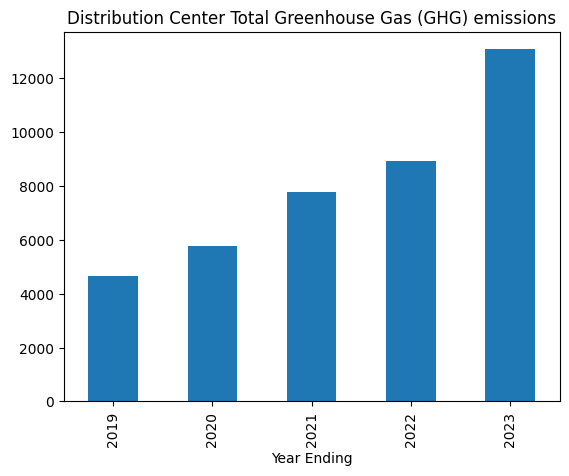

\
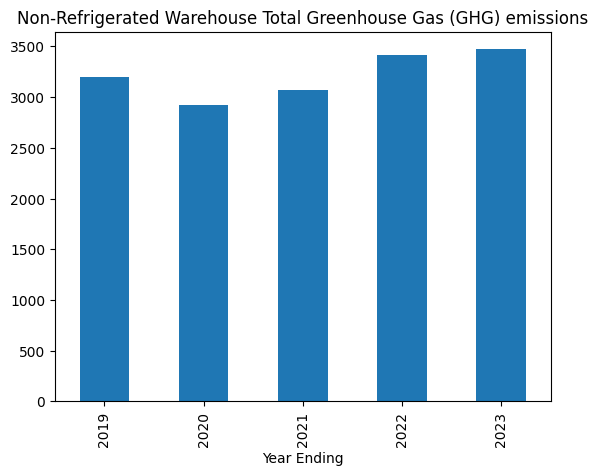

\
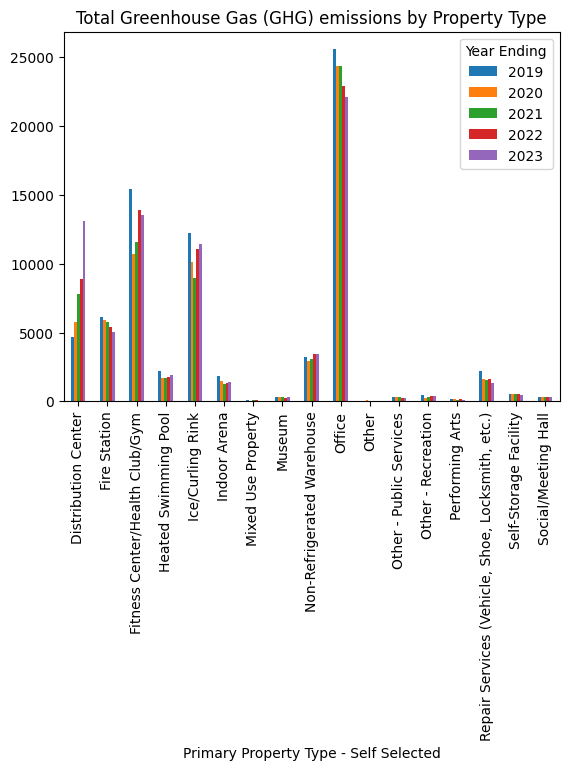

\
The property with the highest energy consumption was the  Stoney Transit Facility which is a Distribution Center with a total consumption of 145,310.96 gigajoules($GJ$). The next largest consumer was the Municipal Complex which is an office with a total consumption of 81,224.82 $GJ$. The Stoney Transit's energy consumption makes up roughly 38% of the total energy consumption of the top 5 highest energy consuming buildings. The remaining three properties are of the type Fitness Center/Health Club/Gym and Ice/Curling Rink.

\
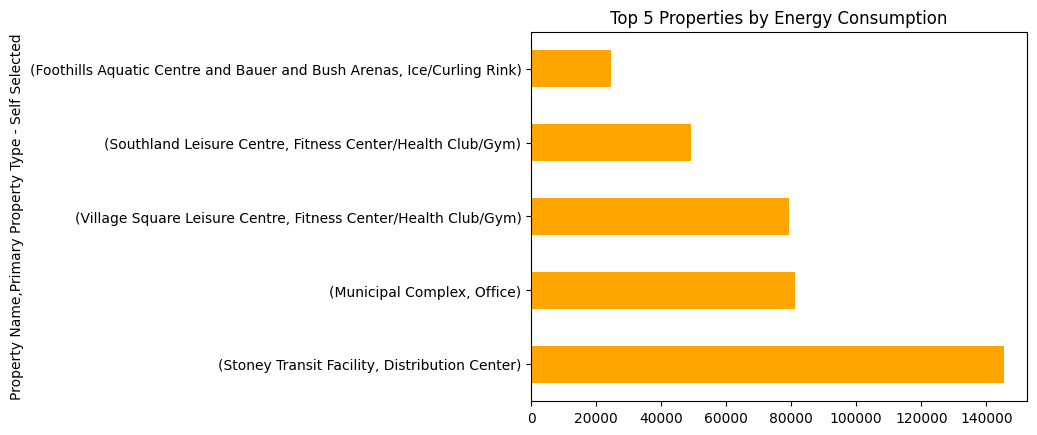

<br>
<br>

### Detecting Outliers Using Regex and IQR
The Interquartile Range (IQR) was the technique used to detect and remove outliers in Total GHG Emissions (Metric Tons CO2e). Outliers were replaced with the median value for each property type

## Data Visualization
### Time-Series Visualization

Most property types' energy consumption  per property square footage have fluctuated a lot over the 5 year period. 
The most stable property types have been Other, Social/Meeting Hall and Non-Refrigerated Warehouse. One of the most steeply growing trend is that of Distribution Centers. Performing Arts and Other-Recreation have the highest consumption per square footage over the years.

Fitness Center/Health Club/Gym properties noted one of the biggest decreases in their energy consumption intensity between 2019 and 2020

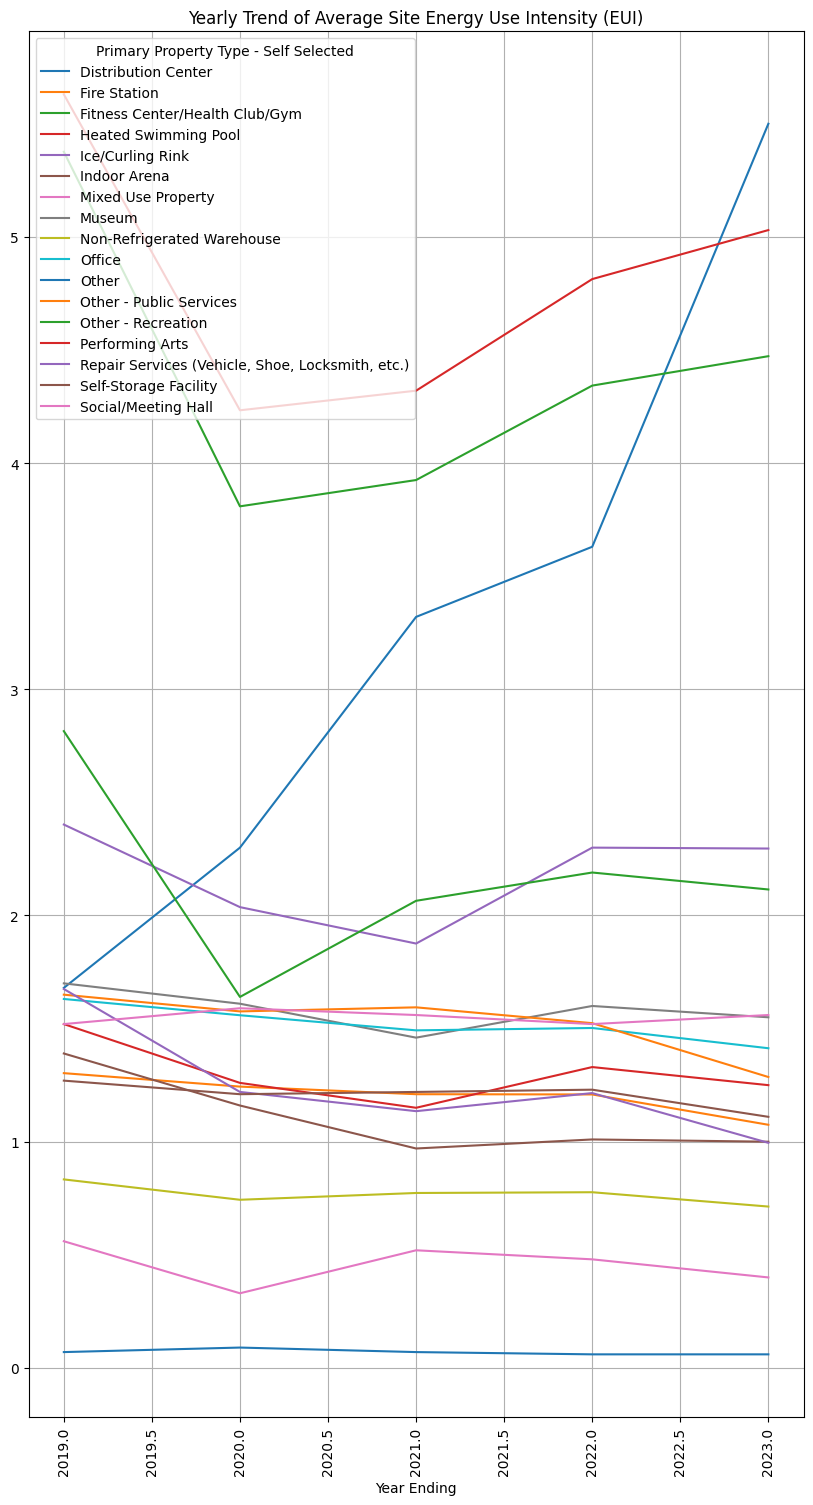


<br>
<br>

### Comparative Bar Charts
The top 3 buildings with the highest GHG emissions are the Stoney Transit Facility, the Calgary Soccer Centre and Annex Water Centre. The lowest on the list include the buildings East Calgary WMF Building S and T and Max Bell and Ken Bracko Arenas.

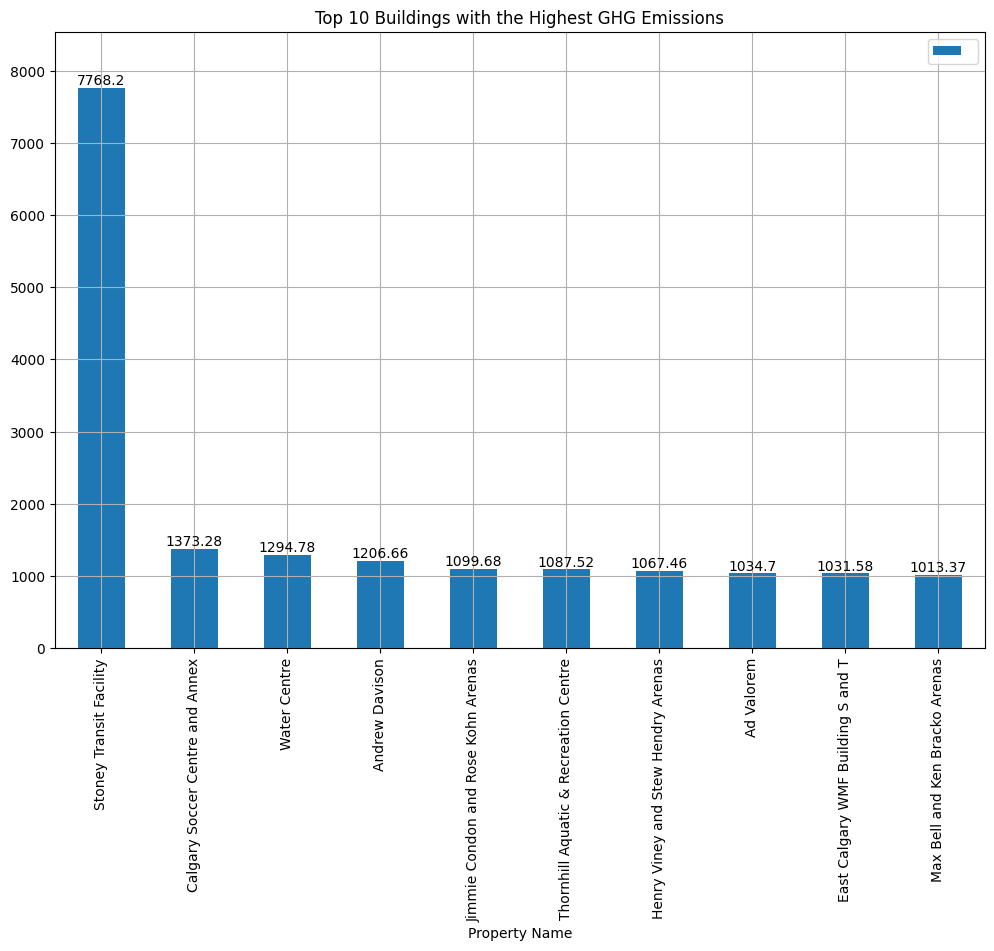

<br>
<br>

### Heatmap Visualization
This heat map describes the energy usage intensity (Site EUI (GJ/m²)) across different property types over the years. Distribution Center, Fitness Center/Health Club/Gym and Heated Swimming Pool are the three property types with the highest energy usage intensity.

As depicted in earlier visualizations, most property types' energy usage intensity have declined over the years except for Distribution Center properties. Fitness Center/Health Club/Gym and Heated Swimming Pool property intensity have also decreased over time but are still the highest of all property types.

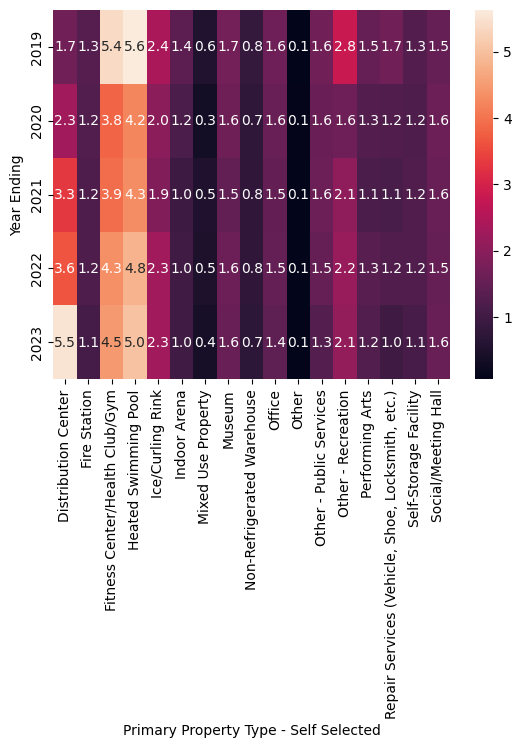

## Further Analysis
A correlation matrix between energy consumption, emissions, 
and building size is visualized below. The order of strong to moderate positively correlated columns are the Total Green House Gases Emissions and Site Energy Use with a coefficient of 0.76, followed by Property Gross Floor Area and Site Energy Use with a coefficient of 0.73 and finally Total Total Green House Gases Emissions and Property Gross Floor Area correlated by 0.48. The coefficients were computed using the Spearmann coefficient which indicates whether there is a linear relationship between variables.


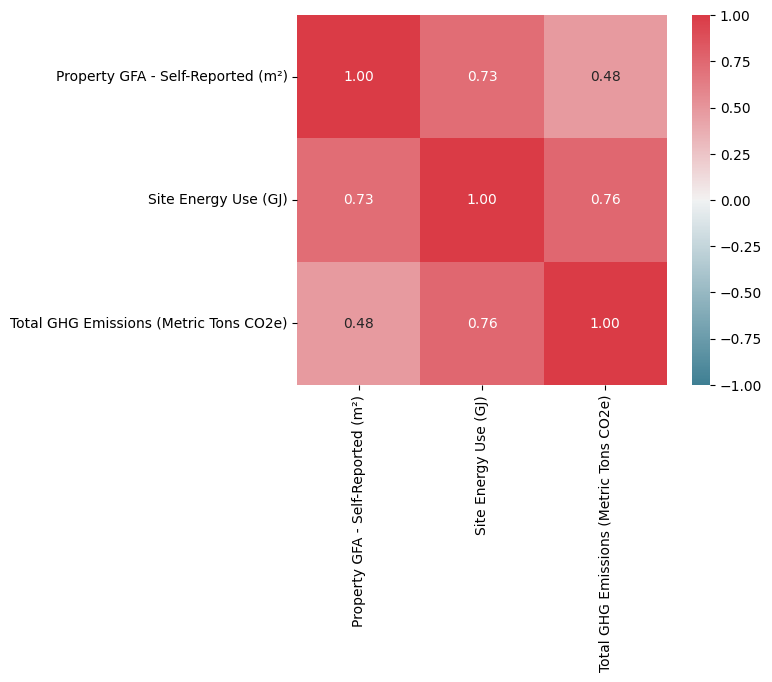

<br>
<br>

### Hypothesis Testing
To consider how energy efficient government owned buildings are to private commercial buildings, we construct a hypothesis test. Taking the means of two random samples from the dataset, we statistically compute the difference between the mean energy consumption intensities between the two property types. Because the sample variances are unequal and population standard deviations are unkown, we calculate the Welch's/unequal variances t-test. The significance level we adopt for the test is 0.05.

$h_0 : $ The mean energy consumption intensity of office property types is the same as that of public services buildings($h_0 : \mu_{EUI_{office}} = \mu_{EUI_{public}}$)\

$h_a : $ The mean energy consumption intensity of office property types is different to that of public services buildings($h_a : \mu_{EUI_{office}} \neq \mu_{EUI_{public}}$)

The test computes a p-value of 0.07 which is greater than the significance level for the test ($pvalue > \alpha$) which is slim statistical evidence that the mean energy consumption intensity of office property types is the same as that of public services buildings. However, these test results may be biased because of the small sample sizes used ,the variances of the samples being unequal, and assumptions about the distribution of the sample. Further, robust testing will be required to conclude more firmly.